In [156]:
import pandas as pd

train = pd.read_csv('train_users_2.csv')
test = pd.read_csv('test_users.csv')
countries = pd.read_csv('countries.csv')
sessions = pd.read_csv('sessions.csv')
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')

In [157]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1,2015
1,95-99,AU,male,9,2015
2,90-94,AU,male,47,2015
3,85-89,AU,male,118,2015
4,80-84,AU,male,199,2015


In [158]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [159]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [160]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06


In [161]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435


In [162]:
%matplotlib inline
import matplotlib.pyplot as plt

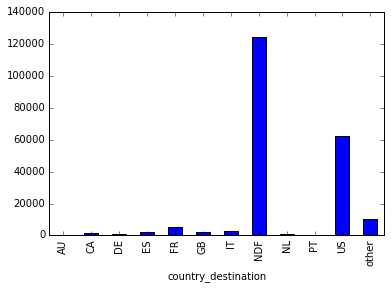

In [163]:
# распределение по странам
train.pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

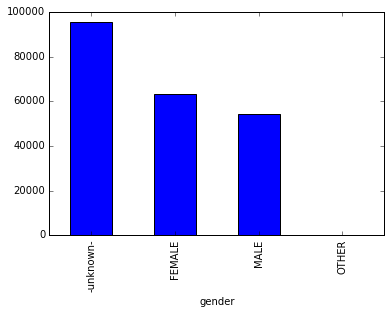

In [164]:
# по полам
train.pivot_table('id', 'gender', aggfunc='count').plot(kind='bar')

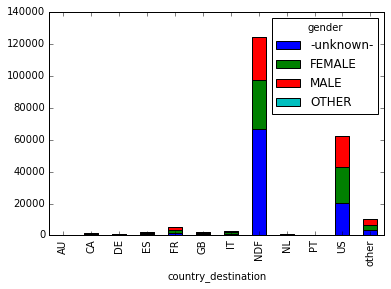

In [165]:
# распределение по странам 
train.pivot_table('id', 'country_destination', 'gender', aggfunc='count').plot(kind='bar', stacked=True)

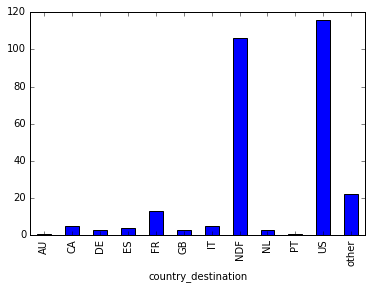

In [166]:
# пол other надо оставить как есть - это хороший признак
# можно сделать признак freak 0/1
train[train['gender'] == 'OTHER'].pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

In [167]:
train.insert(1, 'freak', train.apply(lambda x: int(x['gender']=='OTHER'), axis=1))
test.insert(1, 'freak', test.apply(lambda x: int(x['gender']=='OTHER'), axis=1))

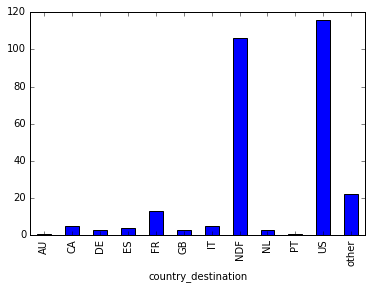

In [198]:
train[train['freak'] == 1].pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

In [169]:
# заготовка для результатов
result = pd.DataFrame()
result['id'] = test.id
result['country'] = 'NDF' 

In [170]:
result.to_csv('ans.csv', index=False)

In [171]:
# удалим поля
drop_fields = ['date_account_created', 'timestamp_first_active', 'date_first_booking', 'signup_method', 'signup_flow',
              'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type',
               'first_browser']

In [172]:
test = test.drop(drop_fields, axis=1)
train = train.drop(drop_fields, axis=1)

In [173]:
# возраст заменяем средним
test.age[test.age.isnull()] = test.age.mean()
train.age[train.age.isnull()] = train.age.mean()

/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [174]:
# язык заменяем английским
test.language[test['language'] == '-unknown-'] = 'en'
train.language[train['language'] == '-unknown-'] = 'en'

/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [175]:
# пол удалим
test = test.drop(['gender'], axis=1)
train = train.drop(['gender'], axis=1)

### Обработка сессий

In [176]:
# уберем NaN
sessions.secs_elapsed[sessions.secs_elapsed.isnull()] = 0

/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [177]:
train['user_id'] = train.id
test['user_id'] = test.id

In [214]:
pd.options.display.max_rows = 999
sessions.groupby('action', as_index=False).agg({'user_id': 'count'}).sort_values('user_id', ascending=False).head()

,action,user_id
287,show,2758985
154,index,841071
281,search_results,723124
214,personalize,704782
280,search,533833


In [178]:
grop_sess = sessions.groupby('user_id', as_index=False)

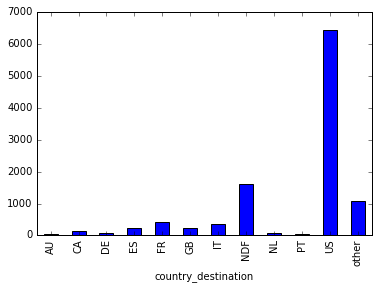

In [196]:
pd.merge(train, sessions[sessions['action_type'] == 'booking_request'],
         how='inner', on=('user_id')).pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

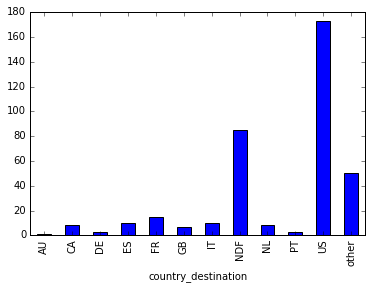

In [215]:
pd.merge(train, sessions[sessions['action'] == 'phone_verification_success'],
         how='inner', on=('user_id')).pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

In [223]:
new_test = pd.merge(train, sessions[sessions['action_type'] == 'booking_request'],
         how='left', on=('user_id'))
# train.insert(1, 'booking_request', train.apply(lambda x: int(x['gender']=='OTHER'), axis=1))

In [224]:
new_test.insert(1, 'booking_request', new_test.apply(lambda x: int(x['action_type']=='booking_request'), axis=1))

In [225]:
new_test.head()

,id,booking_request,freak,age,language,country_destination,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,gxn3p5htnn,0,0,49.668335,en,NDF,gxn3p5htnn,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,0,0,38.000000,en,NDF,820tgsjxq7,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,0,0,56.000000,en,US,4ft3gnwmtx,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,0,0,42.000000,en,other,bjjt8pjhuk,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,0,0,41.000000,en,US,87mebub9p4,NaN,NaN,NaN,NaN,NaN


In [226]:
new_test_2 = pd.merge(new_test, sessions[sessions['action'] == 'phone_verification_success'],
         how='left', on=('user_id'))

In [229]:
new_test_2.insert(1, 'phone_verification_success', new_test_2.apply(lambda x: int(x['action_x']=='phone_verification_success'), axis=1))

In [232]:
# test
new_test_test = pd.merge(test, sessions[sessions['action_type'] == 'booking_request'],
         how='left', on=('user_id'))
new_test_test.insert(1, 'booking_request',
                     new_test_test.apply(lambda x: int(x['action_type']=='booking_request'), axis=1))
new_test_test_2 = pd.merge(new_test_test, sessions[sessions['action'] == 'phone_verification_success'],
         how='left', on=('user_id'))
new_test_test_2.insert(1, 'phone_verification_success',
                       new_test_test_2.apply(lambda x: int(x['action_x']=='phone_verification_success'), axis=1))

In [249]:
_f = filter(lambda x: x not in ['id', 'phone_verification_success', 'booking_request', 'freak',
                                              'age', 'language', 'country_destination'], list(new_test_2.columns.values))

train_1 = new_test_2.drop(_f, axis=1)

_f = filter(lambda x: x not in ['id', 'phone_verification_success', 'booking_request', 'freak',
                                              'age', 'language', 'country_destination'], list(new_test_test_2.columns.values))

test_1 = new_test_test_2.drop(_f, axis=1)

In [252]:
test = test_1
train = train_1

In [179]:
times = grop_sess.agg({'secs_elapsed': 'sum'})
times.head()

,user_id,secs_elapsed
0,00023iyk9l,867896
1,0010k6l0om,586543
2,001wyh0pz8,282965
3,0028jgx1x1,297010
4,002qnbzfs5,6487080


In [180]:
train_with_time = pd.merge(train, times, how='left', on=('user_id'))
test_with_time = pd.merge(test, times, how='left', on=('user_id'))

In [181]:
train_with_time.secs_elapsed[train_with_time.secs_elapsed.isnull()] = 0
test_with_time.secs_elapsed[test_with_time.secs_elapsed.isnull()] = 0

/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/pavel/jupiter/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


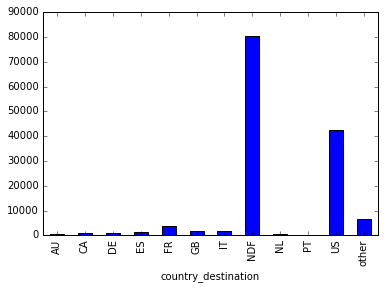

In [185]:
train_with_time[train_with_time['secs_elapsed'] == 0].pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

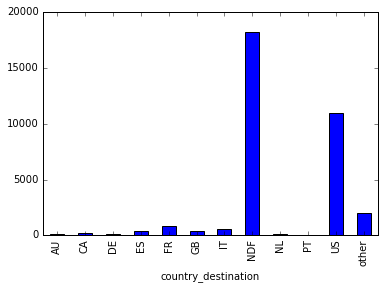

In [189]:
train_with_time[train_with_time['secs_elapsed'] > 1000000].pivot_table('id', 'country_destination', aggfunc='count').plot(kind='bar')

In [184]:
train_with_time.describe()

,freak,age,secs_elapsed
count,213451.000000,213451.000000,213451.000000
mean,0.001321,49.668335,523648.301006
std,0.036324,119.343848,1335853.668939
min,0.000000,1.000000,0.000000
25%,0.000000,32.000000,0.000000
50%,0.000000,49.668335,0.000000
75%,0.000000,49.668335,306046.500000
max,1.000000,2014.000000,38221363.000000


In [253]:
from sklearn.preprocessing import LabelEncoder
label_gender = LabelEncoder()
dicts = {}

# кодируем пол 
if 'gender' in train.columns:
    label_gender.fit(train.gender.drop_duplicates()) #задаем список значений для кодирования
    dicts['gender'] = list(label_gender.classes_)
    train.gender = label_gender.transform(train.gender) #заменяем значения из списка кодами закодированных элементов 
    label_gender.fit(dicts['gender'])
    test.gender = label_gender.transform(test.gender)

# кодируем язык
if 'language' in train.columns:
    label_language = LabelEncoder()
    label_language.fit(train.language.drop_duplicates()) #задаем список значений для кодирования
    dicts['language'] = list(label_language.classes_)
    train.language = label_language.transform(train.language) #заменяем значения из списка кодами закодированных элементов 
    label_language.fit(dicts['language'])
    test.language = label_language.transform(test.language)


In [254]:
from sklearn import cross_validation, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import pylab as pl

In [255]:
train_target = train.country_destination
train_features = train.drop(['country_destination', 'id'], axis=1) #из исходных данных убираем Id и страну
kfold = 5 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

In [256]:
model_rfc = RandomForestClassifier(n_estimators = 80) #в параметре передаем кол-во деревьев
# model_knc = KNeighborsClassifier(n_neighbors = 18) #в параметре передаем кол-во соседей
# model_lr = LogisticRegression(penalty='l1', tol=0.01) 
# model_svc = svm.SVC() #по умолчанию kernek='rbf'

In [257]:
scores = cross_validation.cross_val_score(model_rfc, train_features, train_target, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()

# scores = cross_validation.cross_val_score(model_knc, train_features, train_target, cv = kfold)
# itog_val['KNeighborsClassifier'] = scores.mean()

# scores = cross_validation.cross_val_score(model_lr, train_features, train_target, cv = kfold)
# itog_val['LogisticRegression'] = scores.mean()

# scores = cross_validation.cross_val_score(model_svc, train_features, train_target, cv = kfold)
# itog_val['SVC'] = scores.mean()

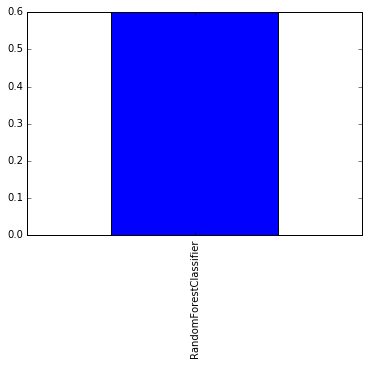

In [258]:
pd.DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

In [259]:
model_rfc.fit(train_features, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
test = test.drop_duplicates(subset='id')

In [276]:
#result = result.drop(['country'], axis=1)
result.insert(1, 'country', model_rfc.predict(test.drop(['id'], axis=1)))

In [260]:
result.to_csv('ans_2.csv', index=False)